[[255   0   0 ...,   0   0   0]
 [255   0   0 ...,   0   0   0]
 [255   0   0 ...,   0   0   0]
 ..., 
 [255   0   0 ...,   0   0   0]
 [255   0   0 ...,   0   0   0]
 [255   0   0 ...,   0   0   0]]


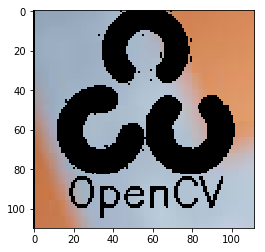

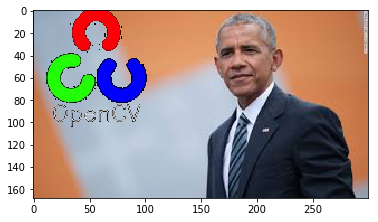

In [39]:
# Load two images
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img1 = mpimg.imread('obama.jpeg')
img2 = mpimg.imread('cv_image.jpg')
# I want to put logo on top-left corner, So I create a ROI
rows,cols,channels = img2.shape
roi = img1[0:rows, 0:cols]
# Now create a mask of logo and create its inverse mask also
img2gray = cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
ret, mask = cv2.threshold(img2gray, 10, 255, cv2.THRESH_BINARY)
# plt.imshow(mask)
# plt.show()
mask_inv = cv2.bitwise_not(mask)
# plt.imshow(mask_inv)
# plt.show()
# Now black-out the area of logo in ROI
img1_bg = cv2.bitwise_and(roi,roi,mask = mask_inv)
plt.imshow(img1_bg)
plt.show()
# Take only region of logo from logo image.
img2_fg = cv2.bitwise_and(img2,img2,mask = mask)
# plt.imshow(img2_fg)
# plt.show()
# Put logo in ROI and modify the main image
dst = cv2.add(img1_bg,img2_fg)
# plt.imshow(dst)
# plt.show()
img1[0:rows, 0:cols ] = dst
# plt.imshow(img1)
# plt.show()
